In [1]:
from utils import test_train_split
from utils import LinearRegression, Metrics
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt, numpy as np, pandas as pd, random

In [2]:
orig_sale_price_df = pd.read_csv('AmesHousing_NumericalFeatures.csv')
sale_prices = list(orig_sale_price_df['SalePrice'].values)

In [3]:
max_sale_price = np.max(sale_prices)
max_sale_price

755000

In [4]:
df = pd.read_csv('AmesHousing_FirstProductHighCorrNormNumFeatures.csv')

In [5]:
df

,Kitchen AbvGr x Open Porch SF,Wood Deck SF,Bedroom AbvGr x Wood Deck SF,Wood Deck SF x Year Remod/Add,Wood Deck SF x Garage Yr Blt,Wood Deck SF x Year Built,Mas Vnr Area x Mas Vnr Area,Lot Area x Total Bsmt SF,Half Bath x Mas Vnr Area,Open Porch SF x Mas Vnr Area,...,Full Bath x Total Bsmt SF,Full Bath x Garage Area,Year Remod/Add x Gr Liv Area,Garage Area x Gr Liv Area,Garage Yr Blt x Gr Liv Area,1st Flr SF x Garage Cars,Year Built x Gr Liv Area,Total Bsmt SF x Garage Cars,Garage Cars x Gr Liv Area,Log SalePrice
0,0.036257,0.147472,0.073736,0.143803,0.143803,0.143803,0.004900,0.026090,0.000000,0.007614,...,0.044190,0.088710,0.286212,0.104150,0.286212,0.130010,0.286212,0.070704,0.117405,0.907194
1,0.000000,0.098315,0.032772,0.095918,0.095918,0.095918,0.000000,0.007794,0.000000,0.000000,...,0.036088,0.122648,0.154937,0.077910,0.154937,0.035172,0.154937,0.028871,0.031762,0.854242
2,0.021053,0.275983,0.137992,0.268843,0.268843,0.268843,0.004556,0.014417,0.033750,0.004263,...,0.054378,0.052419,0.229461,0.049391,0.229461,0.052169,0.229461,0.043502,0.047111,0.890707
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017905,0.000000,0.000000,...,0.172668,0.175403,0.366166,0.131195,0.366166,0.165653,0.366166,0.138134,0.149592,0.916543
4,0.019883,0.148876,0.074438,0.147988,0.147914,0.147914,0.000000,0.009759,0.000000,0.000000,...,0.075941,0.161962,0.287004,0.093526,0.286860,0.072856,0.286860,0.060753,0.115491,0.898022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,0.000000,0.332865,0.221910,0.330547,0.324585,0.324585,0.000000,0.018614,0.000000,0.000000,...,0.050082,0.096774,0.215433,0.083978,0.211548,0.096094,0.211548,0.080131,0.086778,0.870588
2743,0.000000,0.084270,0.042135,0.083180,0.083180,0.083180,0.000000,0.006053,0.000000,0.000000,...,0.041039,0.098790,0.175474,0.070249,0.175474,0.078744,0.175474,0.065663,0.071110,0.876805
2744,0.000000,0.115169,0.038390,0.113621,0.113621,0.113621,0.000000,0.005837,0.000000,0.000000,...,0.035352,0.081317,0.157725,0.052002,0.157725,0.070815,0.157725,0.056563,0.063949,0.870588
2745,0.022222,0.168539,0.056180,0.165605,0.165605,0.165521,0.000000,0.010572,0.000000,0.000000,...,0.056833,0.070228,0.241902,0.069158,0.241902,0.109048,0.241780,0.090933,0.098476,0.889843


In [6]:
max_log_sale_price = np.max([np.log(sale_price) for sale_price in sale_prices])

In [9]:
np.exp(df['Log SalePrice'].iloc[0]*max_log_sale_price)

215000.00000000006

In [11]:
def sale_price_from_norm_log_val(norm_log_val):
    return np.exp(norm_log_val*max_log_sale_price)

In [12]:
sale_price_from_norm_log_val(df['Log SalePrice'].iloc[0])

215000.00000000006

In [10]:
sale_prices[0]

215000

In [13]:
lin_reg = LinearRegression()

In [67]:
X_train, y_train, X_test, y_test = test_train_split(df, 0.2)

In [66]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [68]:
lin_reg.fit(X_train,y_train)

In [69]:
metrics = Metrics(X_test,y_test,lin_reg)

In [70]:
metrics.pretty_print_stats()

sse:     0.1070
sst:     0.4749
mse:     0.0002
r^2:     0.7746
adj_r^2: 0.6224


In [71]:
lin_reg.predict(X_test)

array([[0.89440391],
       [0.90564954],
       [0.85146501],
       [0.92745603],
       [0.89913657],
       [0.92771864],
       [0.91784613],
       [0.87863616],
       [0.88617347],
       [0.8992806 ],
       [0.89230156],
       [0.91395864],
       [0.90919905],
       [0.90015283],
       [0.88201378],
       [0.86506478],
       [0.88308502],
       [0.89947715],
       [0.86103125],
       [0.86062665],
       [0.86128759],
       [0.87010233],
       [0.88073316],
       [0.86334317],
       [0.8411074 ],
       [0.87480087],
       [0.86720832],
       [0.90044974],
       [0.87860333],
       [0.83877821],
       [0.87031342],
       [0.90297498],
       [0.93401701],
       [0.86710954],
       [0.90619886],
       [0.87676246],
       [0.88060676],
       [0.85306417],
       [0.87723554],
       [0.85370941],
       [0.88631658],
       [0.86209187],
       [0.87979119],
       [0.92986549],
       [0.88915981],
       [0.88346232],
       [0.9323665 ],
       [0.853

In [74]:
y_pred = [item[0] for item in lin_reg.predict(X_test)]
y_test = [item[0] for item in y_test]

In [76]:
y_pred = [np.exp(val*max_log_sale_price) for val in y_pred]
y_test = [np.exp(val*max_log_sale_price) for val in y_test]

In [77]:
print(y_pred[:10])
print(y_test[:10])

[180825.10459249446, 210552.29184466583, 101126.77195290051, 282837.7209409963, 192786.69987665451, 283844.7944496782, 248342.40537818804, 146075.27510641952, 161763.53570693947, 193162.87996616508]
[163999.99999999985, 190000.00000000012, 95999.99999999997, 319899.99999999977, 199500.00000000017, 355000.0, 271500.0000000006, 151999.99999999997, 171000.00000000003, 190000.00000000012]


In [78]:
frac_residuals = [(y_pred[i]-y_test[i])/y_test[i] for i in range(len(y_pred))]
print(frac_residuals[:20])

[0.1025921011737477, 0.10816995707718789, 0.05340387450938065, -0.11585582700532505, -0.033650627184689995, -0.2004371987333008, -0.08529500781514732, -0.03897845324723983, -0.054014411070529594, 0.01664673666402614, 0.34676164621497846, 0.024407075410660214, 0.03959665291310949, -0.005309330049219999, 0.07492443633224462, -0.17862184378771104, -0.07378443171714624, 0.21427843127977353, 0.0657915216186321, -0.1520231439924542]


In [79]:
np.max(frac_residuals)

5.873027622213581

In [39]:
frac_residuals.remove(np.max(frac_residuals))

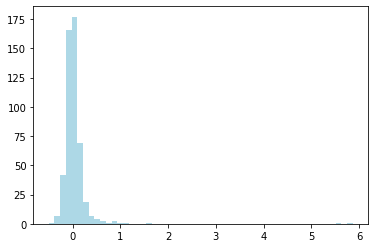

In [80]:
pd.Series(frac_residuals).hist(bins=53, grid=False, color='lightblue')
plt.show()

In [81]:
np.mean(frac_residuals)

0.04148838035597983

In [82]:
np.std(frac_residuals)

0.4019921589613606

In [ ]:
# Before product feature construction and
# target correlation filtering...
# 
# Dollar frac residuals: (mean, std. dev.)
# (0.01778961507618284, 0.3154399514198168)
#
# After product feature construction and
# target correlation filtering...
#
# Dollar frac residuals: (mean, std. dev.)
# (0.010491108556676404, 0.18583892415222936)

In [48]:
(0.01778961507618284-0.010491108556676404)/0.01778961507618284

0.41026781570321047

In [49]:
(0.3154399514198168-0.18583892415222936)/0.3154399514198168

0.4108579990715962

We need to run a sequence of training and testing experiments on distinct random subsets of data and accumulate the set of residual fractions obtained from carrying out the predictions on the test data.